In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from akvmodel import *
from utils import *

In [3]:
np.set_printoptions(precision=2, floatmode="fixed")

def generate_report(influence_graph: list[list[float]], steps=1) -> None:
    num_agents = len(influence_graph)
    initial_configuration = InitialConfigurations.mildly(num_agents)
    model = AKV(
        initial_configuration,
        influence_graph,
        UpdateFunctions.dynamic_influence_with_belief_update,
    )
    for _ in range(steps):
        model.update()
    for i in range(steps + 1):
        print(f"== Time {i} ==\n")
        print("Influence graph:")
        print(
            f"Is flow conservative: {is_flow_conservative(model.influence_graph_history[i], num_agents)}"
        )
        print(model.influence_graph_history[i])
        print(f"Influence sum:\n{model.influence_graph_history[i].sum(axis=1)}")
        print(f"Influenced sum:\n{model.influence_graph_history[i].sum(axis=0)}")
    draw_graph_2(model)

## Examples of graphs that becomes unbalanced

### Star graphs - $K_{1, n}$

In particular, $K_{1, 3}$.

== Time 0 ==

Influence graph:
Is flow conservative: True
[[1.00 0.50 0.50 0.50]
 [0.50 1.00 0.00 0.00]
 [0.50 0.00 1.00 0.00]
 [0.50 0.00 0.00 1.00]]
Influence sum:
[2.50 1.50 1.50 1.50]
Influenced sum:
[2.50 1.50 1.50 1.50]
== Time 1 ==

Influence graph:
Is flow conservative: False
[[1.00 0.56 0.56 0.56]
 [0.44 1.00 0.06 0.06]
 [0.44 0.06 1.00 0.06]
 [0.44 0.06 0.06 1.00]]
Influence sum:
[2.69 1.56 1.56 1.56]
Influenced sum:
[2.31 1.69 1.69 1.69]


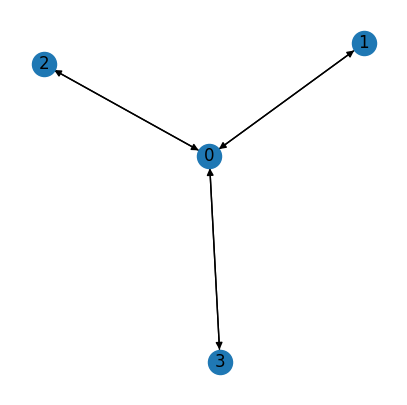

In [4]:
generate_report(
    np.array(
        [
            [1.0, 0.5, 0.5, 0.5],
            [0.5, 1.0, 0.0, 0.0],
            [0.5, 0.0, 1.0, 0.0],
            [0.5, 0.0, 0.0, 1.0],
        ]
    )
)

### Friendship graphs - F_n, or these particular cases of Windmill graphs - Wd_{3, n}

In particular, $F_2$.

== Time 0 ==

Influence graph:
Is flow conservative: True
[[1.00 0.50 0.50 0.50 0.50]
 [0.50 1.00 0.50 0.00 0.00]
 [0.50 0.50 1.00 0.00 0.00]
 [0.50 0.00 0.00 1.00 0.50]
 [0.50 0.00 0.00 0.50 1.00]]
Influence sum:
[3.00 2.00 2.00 2.00 2.00]
Influenced sum:
[3.00 2.00 2.00 2.00 2.00]
== Time 1 ==

Influence graph:
Is flow conservative: False
[[1.00 0.55 0.55 0.55 0.55]
 [0.45 1.00 0.55 0.05 0.05]
 [0.45 0.55 1.00 0.05 0.05]
 [0.45 0.05 0.05 1.00 0.55]
 [0.45 0.05 0.05 0.55 1.00]]
Influence sum:
[3.20 2.10 2.10 2.10 2.10]
Influenced sum:
[2.80 2.20 2.20 2.20 2.20]


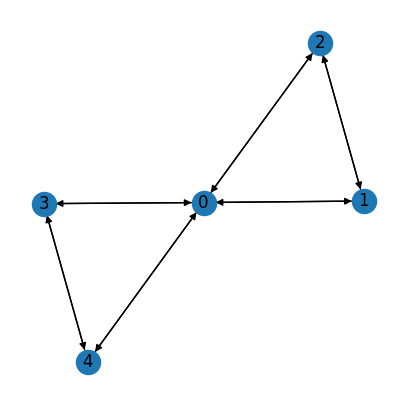

In [5]:
generate_report(
    np.array(
        [
            [1.0, 0.5, 0.5, 0.5, 0.5],
            [0.5, 1.0, 0.5, 0.0, 0.0],
            [0.5, 0.5, 1.0, 0.0, 0.0],
            [0.5, 0.0, 0.0, 1.0, 0.5],
            [0.5, 0.0, 0.0, 0.5, 1.0],
        ]
    )
)

### Bicolored graphs with the diferent number of nodes for each group - $K_{m, n}$ s.t. $m \neq n$

In particular, $K_{3, 2}$

== Time 0 ==

Influence graph:
Is flow conservative: True
[[1.00 0.00 0.00 0.50 0.50]
 [0.00 1.00 0.00 0.50 0.50]
 [0.00 0.00 1.00 0.50 0.50]
 [0.50 0.50 0.50 1.00 0.00]
 [0.50 0.50 0.50 0.00 1.00]]
Influence sum:
[2.00 2.00 2.00 2.50 2.50]
Influenced sum:
[2.00 2.00 2.00 2.50 2.50]
== Time 1 ==

Influence graph:
Is flow conservative: False
[[1.00 0.10 0.10 0.45 0.45]
 [0.10 1.00 0.10 0.45 0.45]
 [0.10 0.10 1.00 0.45 0.45]
 [0.50 0.50 0.50 1.00 0.15]
 [0.50 0.50 0.50 0.15 1.00]]
Influence sum:
[2.10 2.10 2.10 2.65 2.65]
Influenced sum:
[2.20 2.20 2.20 2.50 2.50]


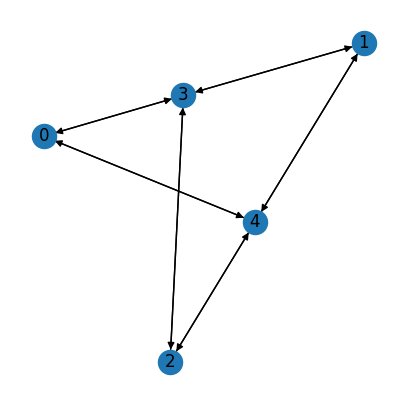

In [6]:
generate_report(
    np.array(
        [
            [1.0, 0.0, 0.0, 0.5, 0.5],
            [0.0, 1.0, 0.0, 0.5, 0.5],
            [0.0, 0.0, 1.0, 0.5, 0.5],
            [0.5, 0.5, 0.5, 1.0, 0.0],
            [0.5, 0.5, 0.5, 0.0, 1.0],
        ]
    )
)

### Wheel graphs with $5$ or mode nodes - W_n

Because $W_4 = K_4$. In particular, $W_5$.

== Time 0 ==

Influence graph:
Is flow conservative: True
[[1.00 1.00 1.00 1.00 1.00]
 [1.00 1.00 0.50 0.00 0.50]
 [1.00 0.50 1.00 0.50 0.00]
 [1.00 0.00 0.50 1.00 0.50]
 [1.00 0.50 0.00 0.50 1.00]]
Influence sum:
[5.00 3.00 3.00 3.00 3.00]
Influenced sum:
[5.00 3.00 3.00 3.00 3.00]
== Time 1 ==

Influence graph:
Is flow conservative: False
[[1.00 1.00 1.00 1.00 1.00]
 [0.60 1.00 0.60 0.30 0.60]
 [0.60 0.60 1.00 0.60 0.30]
 [0.60 0.30 0.60 1.00 0.60]
 [0.60 0.60 0.30 0.60 1.00]]
Influence sum:
[5.00 3.10 3.10 3.10 3.10]
Influenced sum:
[3.40 3.50 3.50 3.50 3.50]


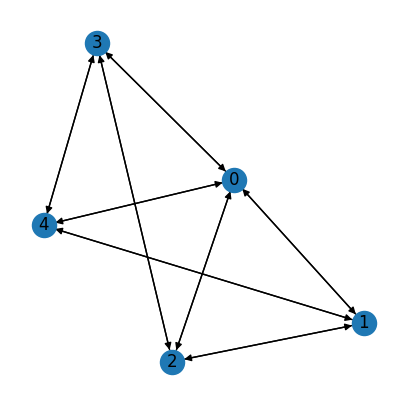

In [7]:
generate_report(
    np.array(
        [
            [1.0, 1.0, 1.0, 1.0, 1.0],
            [1.0, 1.0, 0.5, 0.0, 0.5],
            [1.0, 0.5, 1.0, 0.5, 0.0],
            [1.0, 0.0, 0.5, 1.0, 0.5],
            [1.0, 0.5, 0.0, 0.5, 1.0],
        ]
    )
)

### A graph with $K_5$ induced

== Time 0 ==

Influence graph:
Is flow conservative: True
[[1.00 0.50 0.50 0.50 0.50 0.00 0.00 0.00 0.00]
 [0.50 1.00 0.50 0.00 0.50 0.50 0.00 0.00 0.00]
 [0.50 0.50 1.00 0.50 0.00 0.00 0.50 0.00 0.00]
 [0.50 0.00 0.50 1.00 0.50 0.00 0.00 0.50 0.00]
 [0.50 0.50 0.00 0.50 1.00 0.00 0.00 0.00 0.50]
 [0.00 0.50 0.00 0.00 0.00 1.00 0.50 0.00 0.50]
 [0.00 0.00 0.50 0.00 0.00 0.50 1.00 0.50 0.00]
 [0.00 0.00 0.00 0.50 0.00 0.00 0.50 1.00 0.50]
 [0.00 0.00 0.00 0.00 0.50 0.50 0.00 0.50 1.00]]
Influence sum:
[3.00 3.00 3.00 3.00 3.00 2.50 2.50 2.50 2.50]
Influenced sum:
[3.00 3.00 3.00 3.00 3.00 2.50 2.50 2.50 2.50]
== Time 1 ==

Influence graph:
Is flow conservative: False
[[1.00 0.50 0.50 0.50 0.50 0.03 0.03 0.03 0.03]
 [0.50 1.00 0.47 0.08 0.47 0.47 0.06 0.00 0.06]
 [0.50 0.47 1.00 0.47 0.08 0.06 0.47 0.06 0.00]
 [0.50 0.08 0.47 1.00 0.47 0.00 0.06 0.47 0.06]
 [0.50 0.47 0.08 0.47 1.00 0.06 0.00 0.06 0.47]
 [0.03 0.44 0.06 0.00 0.06 1.00 0.47 0.06 0.47]
 [0.03 0.06 0.44 0.06 0.00 0.47 1.00 

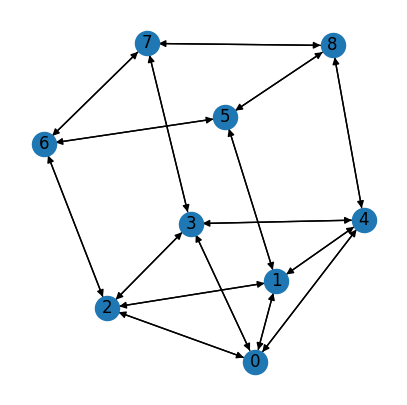

In [8]:
generate_report(
    np.array(
        [
            [1, .5, .5, .5, .5, 0, 0, 0, 0],
            [.5, 1, .5, 0, .5, .5, 0, 0, 0],
            [.5, .5, 1, .5, 0, 0, .5, 0, 0],
            [.5, 0, .5, 1, .5, 0, 0, .5, 0],
            [.5, .5, 0, .5, 1, 0, 0, 0, .5],
            [0, .5, 0, 0, 0, 1, .5, 0, .5],
            [0, 0, .5, 0, 0, .5, 1, .5, 0],
            [0, 0, 0, .5, 0, 0, .5, 1, .5],
            [0, 0, 0, 0, .5, .5, 0, .5, 1],
        ]
    )
)

## Examples of graphs that DOES NOT become unbalanced

### Complete graph - $K_n$

In particular $K_4$.

== Time 0 ==

Influence graph:
Is flow conservative: True
[[1.00 0.50 0.50 0.50]
 [0.50 1.00 0.50 0.50]
 [0.50 0.50 1.00 0.50]
 [0.50 0.50 0.50 1.00]]
Influence sum:
[2.50 2.50 2.50 2.50]
Influenced sum:
[2.50 2.50 2.50 2.50]
== Time 1 ==

Influence graph:
Is flow conservative: True
[[1.00 0.56 0.56 0.56]
 [0.56 1.00 0.56 0.56]
 [0.56 0.56 1.00 0.56]
 [0.56 0.56 0.56 1.00]]
Influence sum:
[2.69 2.69 2.69 2.69]
Influenced sum:
[2.69 2.69 2.69 2.69]


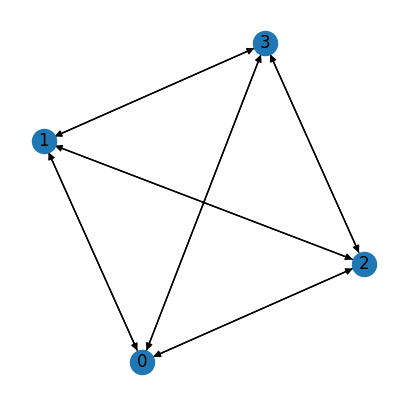

In [9]:
generate_report(
    np.array(
        [
            [1.0, 0.5, 0.5, 0.5],
            [0.5, 1.0, 0.5, 0.5],
            [0.5, 0.5, 1.0, 0.5],
            [0.5, 0.5, 0.5, 1.0]
        ]
    )
)

### Bicolored graphs with the same number of nodes for each group - $K_{n, n}$

In particular, $K_{3, 3}$.

In [10]:
C = 0.3
C_ = 0
A = 4
C + (1 / A) * (C * (1 - C) + (A / 2 - 1) * (C * (C_ - C))), C_ + (1 / A) * (A / 2) * C * (C - C_)

(0.32999999999999996, 0.045)

== Time 0 ==

Influence graph:
Is flow conservative: True
[[1.00 0.00 0.30 0.30]
 [0.00 1.00 0.30 0.30]
 [0.30 0.30 1.00 0.00]
 [0.30 0.30 0.00 1.00]]
Influence sum:
[1.60 1.60 1.60 1.60]
Influenced sum:
[1.60 1.60 1.60 1.60]
== Time 1 ==

Influence graph:
Is flow conservative: True
[[1.00 0.04 0.33 0.33]
 [0.04 1.00 0.33 0.33]
 [0.33 0.33 1.00 0.04]
 [0.33 0.33 0.04 1.00]]
Influence sum:
[1.71 1.71 1.70 1.71]
Influenced sum:
[1.71 1.71 1.70 1.71]


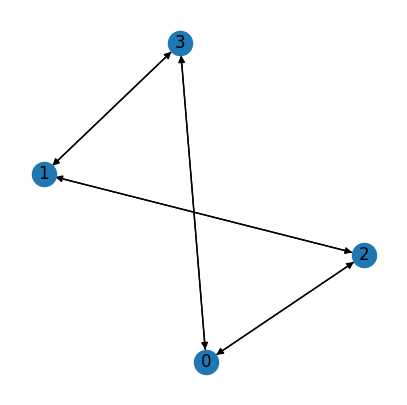

In [11]:
generate_report(
    np.array(
        [
            [1.0, 0.0, 0.3, 0.3],
            [0.0, 1.0, 0.3, 0.3],
            [0.3, 0.3, 1.0, 0.0],
            [0.3, 0.3, 0.0, 1.0],
        ]
    )
)